In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()
folder_path = os.getenv('file_path_Munch')

In [5]:
def process_images(folder_path):
    results = {}
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width
            normalized_length = edge_length / area
            
            results[filename] = normalized_length
    
    return results

def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 1.5
    plt.figure(figsize=(50, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Image Filename')
    plt.ylabel('Normalized Edge Length')
    plt.title('Edge Length Normalized by Image Area')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


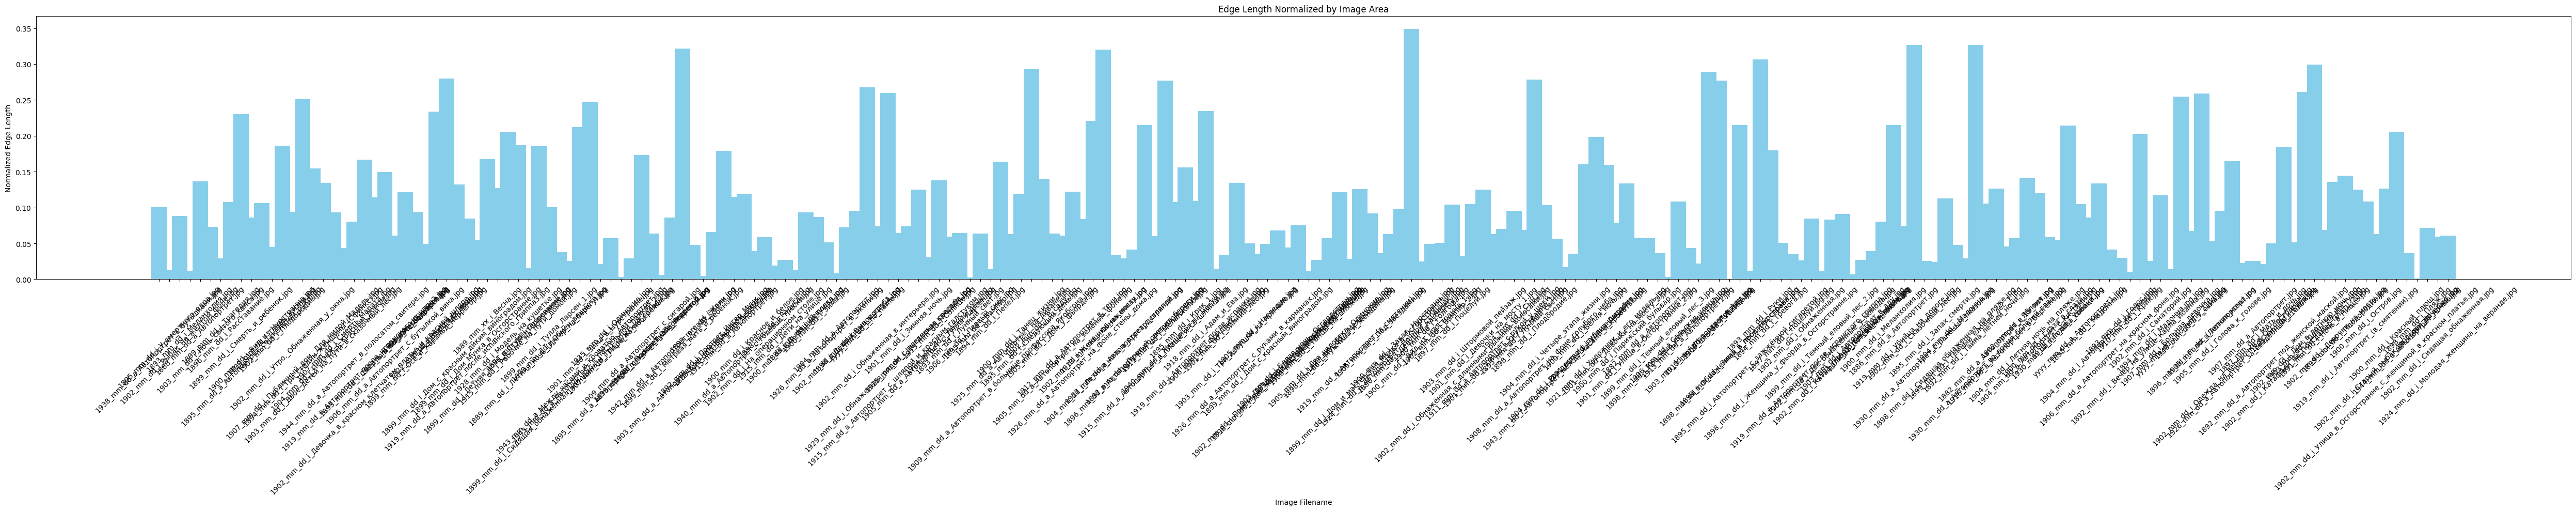

In [6]:
res = process_images(folder_path)

plot_results(res)

In [7]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width

            normalized_length = edge_length / area

            if year in results:
                results[year].append(normalized_length)
            else:
                results[year] = [normalized_length]

    averaged_results = {year: np.mean(values) for year, values in results.items()}

    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Year')
    plt.ylabel('Average Normalized Edge Length')
    plt.title('Average Edge Length Normalized by Image Area per Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

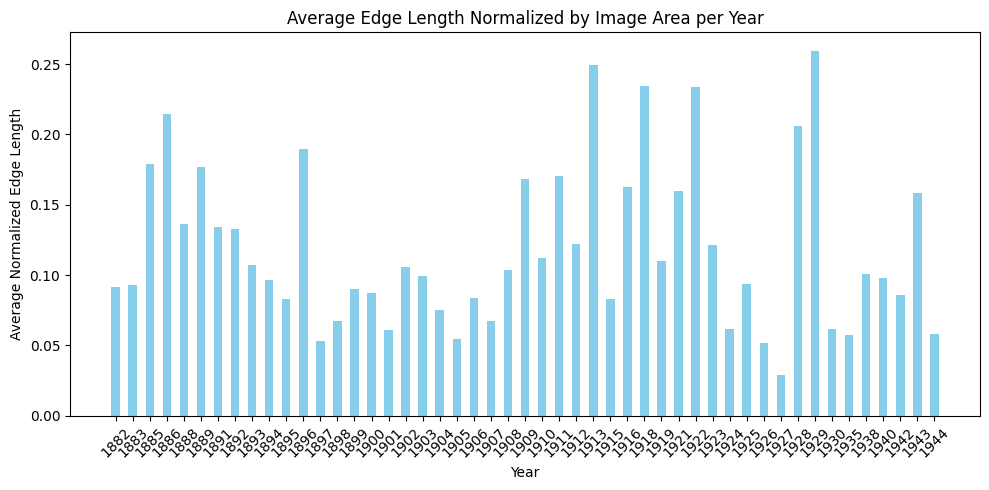

In [8]:
res = process_images(folder_path)

plot_results(res)